In [104]:
# Please put all imports and required pip installs in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats


# Introduction

This notebook is designed to test a candidate's python and data handling skills. All code should be written so that it can run on similar data from different timeframes, and be efficient on large dataframes. Your code will be run against the provided CSVs and also unseen CSVs from different points in time.

Please try and make your variable names and function names as clear as possible.

The first section is **DIRECTED**. Please answer the questions precisely and as concisely as possible. This makes evaluation easier across candidates.

The modelling section is **UNDIRECTED**. Please explore the problem as you see fit.

# Data Manipulation

Load the project_week data into a pandas dataframe

In [105]:
project_week = pd.read_csv('./project_week.csv')
project_week

,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_START,BUDGET_END,CFDA_CODE,CORE_PROJECT_NUM,...,SERIAL_NUMBER,STUDY_SECTION,STUDY_SECTION_NAME,SUBPROJECT_ID,SUFFIX,SUPPORT_YEAR,DIRECT_COST_AMT,INDIRECT_COST_AMT,TOTAL_COST,TOTAL_COST_SUB_PROJECT
0,10281416,Y01,CA,NaN,N,NaN,NaN,NaN,NaN,Y01PC200050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000,NaN
1,10281436,Y01,CA,NaN,N,NaN,NaN,NaN,NaN,Y01PC200110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000,NaN
2,10249926,Y01,AI,NaN,N,NaN,NaN,NaN,NaN,Y01AI200510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2260354,NaN
3,10281756,Y01,AR,NaN,N,NaN,NaN,NaN,NaN,Y01AR170020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340894,NaN
4,10281028,Y01,AI,NaN,N,NaN,NaN,NaN,NaN,Y01AI120033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000000,NaN
5,10281487,Y01,CA,NaN,N,NaN,NaN,NaN,NaN,Y01PC200080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000,NaN
6,10282681,Y01,AI,NaN,N,NaN,NaN,NaN,NaN,Y01AI200400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000,NaN
7,10281427,Y01,CA,NaN,N,NaN,NaN,NaN,NaN,Y01PC200010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52807,NaN
8,10282158,Y01,ES,NaN,N,NaN,NaN,NaN,NaN,Y01ES200030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135814,NaN
9,10282164,Y01,ES,NaN,N,NaN,NaN,NaN,NaN,Y01ES200030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363406,NaN


Cleaning 1: Remove all columns which are entirely null

In [106]:
project_week_filtered = project_week.dropna(axis=1, how='all')
project_week_filtered.head()

,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,ARRA_FUNDED,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FUNDING_ICs,FUNDING_MECHANISM,FY,IC_NAME,ORG_NAME,PI_IDS,PI_NAMEs,PROJECT_TERMS,PROJECT_TITLE,TOTAL_COST
0,10281416,Y01,CA,N,Y01PC200050,APC20005001-1-0-1,NCI:1000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897325;,"LAKE, JOE ;",Address; Adolescent and Young Adult; Adult; Ag...,Childhood Cancer Data Initiative National Chil...,1000000
1,10281436,Y01,CA,N,Y01PC200110,APC20011001-1-0-1,NCI:50000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897393;,"HE, YULEI ;",Agreement; Area; base; Behavior; Behavioral Ri...,Small Area Estimation for Cancer Risk Factors ...,50000
2,10249926,Y01,AI,N,Y01AI200510,AAI20051001-1-0-1,NIAID:2260354\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,;,", ;",Animal Model; animal model development; Bone M...,Hematopoietic and GI acute radiation Syndromes...,2260354
3,10281756,Y01,AR,N,Y01AR170020,AAR17002002-2-0-1,NIAMS:340894\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ARTHRITIS AND MUSCULOSKE...,NATIONAL INSTITUTE OF ARTHRITIS AND MUSCULOSKE...,;,", ;",Collaborations; Dual-Energy X-Ray Absorptiomet...,National Health and Nutrition Examination Surv...,340894
4,10281028,Y01,AI,N,Y01AI120033,AAI12003300-0-0-1,NIAID:4000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77896344;,"BURGESS, TIMOTHY ;",Agreement; Area; beneficiary; Biological Speci...,The Infectious Disease Clinical Research Progr...,4000000


Cleaning 2: The projects data has two columns describing the principle investigator - PI. Drop entries for which we cannot identify the PI

In [107]:
project_week_filtered['PI_IDS'] = project_week_filtered['PI_IDS'].replace('; ', np.nan)
project_week_filtered['PI_NAMEs'] = project_week_filtered['PI_NAMEs'].replace(',  ;', np.nan)
project_week_filtered.dropna(axis=0, how='any', subset=['PI_IDS', 'PI_NAMEs'], inplace=True)
project_week_filtered

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,ARRA_FUNDED,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FUNDING_ICs,FUNDING_MECHANISM,FY,IC_NAME,ORG_NAME,PI_IDS,PI_NAMEs,PROJECT_TERMS,PROJECT_TITLE,TOTAL_COST
0,10281416,Y01,CA,N,Y01PC200050,APC20005001-1-0-1,NCI:1000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897325;,"LAKE, JOE ;",Address; Adolescent and Young Adult; Adult; Ag...,Childhood Cancer Data Initiative National Chil...,1000000
1,10281436,Y01,CA,N,Y01PC200110,APC20011001-1-0-1,NCI:50000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897393;,"HE, YULEI ;",Agreement; Area; base; Behavior; Behavioral Ri...,Small Area Estimation for Cancer Risk Factors ...,50000
4,10281028,Y01,AI,N,Y01AI120033,AAI12003300-0-0-1,NIAID:4000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77896344;,"BURGESS, TIMOTHY ;",Agreement; Area; beneficiary; Biological Speci...,The Infectious Disease Clinical Research Progr...,4000000
5,10281487,Y01,CA,N,Y01PC200080,APC20008001-1-0-1,NCI:2000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897499;,"MARTINEZ, MICHAEL ;",Agreement; authority; Cancer Control; Censuses...,2021 NHIS Cancer Control Supplement: Cancer Qu...,2000000
6,10282681,Y01,AI,N,Y01AI200400,AAI20040001-1-0-1,NIAID:160000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77900406;,"GOLDING, HANA ;",NaN,Development of technologies for evaluation of ...,160000
7,10281427,Y01,CA,N,Y01PC200010,APC20001001-1-0-1,NCI:52807\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897355;,"RANN, BRENDA ;",Agreement; beneficiary; cancer survival; Cessa...,Surveillance Epidemiology and End Results (SEE...,52807
8,10282158,Y01,ES,N,Y01ES200030,AES20003001-1-0-1,NIEHS:135814\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,77899251;,"BEEZHOLD, DONALD ;",NaN,Assessment of Inhalation Exposures to Indoor a...,135814
9,10282164,Y01,ES,N,Y01ES200030,AES20003001-1-0-2,NIEHS:363406\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,77899247;,"GREEN, BRETT ;",NaN,Assessment of Inhalation Exposures to Indoor a...,363406
11,10281431,Y01,CA,N,Y01PC200020,APC20002001-1-0-1,NCI:29211\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897372;,"RANN, BRENDA ;",Agreement; cancer health disparity; cancer sur...,"SSA: Surveillance, Epidemiology, and End Resul...",29211
13,10281503,Y01,CA,N,Y01PC200070,APC20007001-1-0-1,NCI:55000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897526;,"JOHNSON, NORMAN ;",Agreement; Archives; Censuses; computerized da...,The Tobacco Use Supplement to the Current Popu...,55000


Display the percentage of columns removed and of rows removed from the original projects CSV

In [108]:
col_removed = (project_week.shape[1] - project_week_filtered.shape[1]) / project_week.shape[1] *100
row_removed = (project_week.shape[0] - project_week_filtered.shape[0]) / project_week.shape[0] *100
print('Columns removed (%):', round(col_removed, 1))
print('Rows removed (%):', round(row_removed, 1))

Columns removed (%): 65.2
Rows removed (%): 25.0


We also want to clean up the PI columns. For IDs - we just want the first number in the field as the principle investigator. For Names, remove any trailing whitespace and semicolons.

In [109]:
project_week_filtered['PI_IDS'] = project_week_filtered['PI_IDS'].str.split(';', expand=True)[0]
project_week_filtered['PI_NAMEs'] = project_week_filtered['PI_NAMEs'].str.rstrip(' ;')
project_week_filtered

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,ARRA_FUNDED,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FUNDING_ICs,FUNDING_MECHANISM,FY,IC_NAME,ORG_NAME,PI_IDS,PI_NAMEs,PROJECT_TERMS,PROJECT_TITLE,TOTAL_COST
0,10281416,Y01,CA,N,Y01PC200050,APC20005001-1-0-1,NCI:1000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897325,"LAKE, JOE",Address; Adolescent and Young Adult; Adult; Ag...,Childhood Cancer Data Initiative National Chil...,1000000
1,10281436,Y01,CA,N,Y01PC200110,APC20011001-1-0-1,NCI:50000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897393,"HE, YULEI",Agreement; Area; base; Behavior; Behavioral Ri...,Small Area Estimation for Cancer Risk Factors ...,50000
4,10281028,Y01,AI,N,Y01AI120033,AAI12003300-0-0-1,NIAID:4000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77896344,"BURGESS, TIMOTHY",Agreement; Area; beneficiary; Biological Speci...,The Infectious Disease Clinical Research Progr...,4000000
5,10281487,Y01,CA,N,Y01PC200080,APC20008001-1-0-1,NCI:2000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897499,"MARTINEZ, MICHAEL",Agreement; authority; Cancer Control; Censuses...,2021 NHIS Cancer Control Supplement: Cancer Qu...,2000000
6,10282681,Y01,AI,N,Y01AI200400,AAI20040001-1-0-1,NIAID:160000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77900406,"GOLDING, HANA",NaN,Development of technologies for evaluation of ...,160000
7,10281427,Y01,CA,N,Y01PC200010,APC20001001-1-0-1,NCI:52807\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897355,"RANN, BRENDA",Agreement; beneficiary; cancer survival; Cessa...,Surveillance Epidemiology and End Results (SEE...,52807
8,10282158,Y01,ES,N,Y01ES200030,AES20003001-1-0-1,NIEHS:135814\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,77899251,"BEEZHOLD, DONALD",NaN,Assessment of Inhalation Exposures to Indoor a...,135814
9,10282164,Y01,ES,N,Y01ES200030,AES20003001-1-0-2,NIEHS:363406\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,77899247,"GREEN, BRETT",NaN,Assessment of Inhalation Exposures to Indoor a...,363406
11,10281431,Y01,CA,N,Y01PC200020,APC20002001-1-0-1,NCI:29211\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897372,"RANN, BRENDA",Agreement; cancer health disparity; cancer sur...,"SSA: Surveillance, Epidemiology, and End Resul...",29211
13,10281503,Y01,CA,N,Y01PC200070,APC20007001-1-0-1,NCI:55000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897526,"JOHNSON, NORMAN",Agreement; Archives; Censuses; computerized da...,The Tobacco Use Supplement to the Current Popu...,55000


The full project number column is encoded as a string currently. Later in the analysis it would be useful to group on part of this field. It is currently delimited by the dash character: '-'. Convert the column into a series containing lists.

In [110]:
project_week_filtered['FULL_PROJECT_NUM'] = project_week_filtered['FULL_PROJECT_NUM'].str.split('-')
project_week_filtered

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,ARRA_FUNDED,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FUNDING_ICs,FUNDING_MECHANISM,FY,IC_NAME,ORG_NAME,PI_IDS,PI_NAMEs,PROJECT_TERMS,PROJECT_TITLE,TOTAL_COST
0,10281416,Y01,CA,N,Y01PC200050,"[APC20005001, 1, 0, 1]",NCI:1000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897325,"LAKE, JOE",Address; Adolescent and Young Adult; Adult; Ag...,Childhood Cancer Data Initiative National Chil...,1000000
1,10281436,Y01,CA,N,Y01PC200110,"[APC20011001, 1, 0, 1]",NCI:50000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897393,"HE, YULEI",Agreement; Area; base; Behavior; Behavioral Ri...,Small Area Estimation for Cancer Risk Factors ...,50000
4,10281028,Y01,AI,N,Y01AI120033,"[AAI12003300, 0, 0, 1]",NIAID:4000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77896344,"BURGESS, TIMOTHY",Agreement; Area; beneficiary; Biological Speci...,The Infectious Disease Clinical Research Progr...,4000000
5,10281487,Y01,CA,N,Y01PC200080,"[APC20008001, 1, 0, 1]",NCI:2000000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897499,"MARTINEZ, MICHAEL",Agreement; authority; Cancer Control; Censuses...,2021 NHIS Cancer Control Supplement: Cancer Qu...,2000000
6,10282681,Y01,AI,N,Y01AI200400,"[AAI20040001, 1, 0, 1]",NIAID:160000\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,77900406,"GOLDING, HANA",NaN,Development of technologies for evaluation of ...,160000
7,10281427,Y01,CA,N,Y01PC200010,"[APC20001001, 1, 0, 1]",NCI:52807\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897355,"RANN, BRENDA",Agreement; beneficiary; cancer survival; Cessa...,Surveillance Epidemiology and End Results (SEE...,52807
8,10282158,Y01,ES,N,Y01ES200030,"[AES20003001, 1, 0, 1]",NIEHS:135814\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,77899251,"BEEZHOLD, DONALD",NaN,Assessment of Inhalation Exposures to Indoor a...,135814
9,10282164,Y01,ES,N,Y01ES200030,"[AES20003001, 1, 0, 2]",NIEHS:363406\,INTERAGENCY AGREEMENTS,2020,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,NATIONAL INSTITUTE OF ENVIRONMENTAL HEALTH SCI...,77899247,"GREEN, BRETT",NaN,Assessment of Inhalation Exposures to Indoor a...,363406
11,10281431,Y01,CA,N,Y01PC200020,"[APC20002001, 1, 0, 1]",NCI:29211\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897372,"RANN, BRENDA",Agreement; cancer health disparity; cancer sur...,"SSA: Surveillance, Epidemiology, and End Resul...",29211
13,10281503,Y01,CA,N,Y01PC200070,"[APC20007001, 1, 0, 1]",NCI:55000\,INTERAGENCY AGREEMENTS,2020,NATIONAL CANCER INSTITUTE,NATIONAL CANCER INSTITUTE,77897526,"JOHNSON, NORMAN",Agreement; Archives; Censuses; computerized da...,The Tobacco Use Supplement to the Current Popu...,55000


# Computation and Visualisation

Display a 10 inch by 10 inch bar chart of average project total cost for each Administering IC, with red bars and 25% gap between the bars.

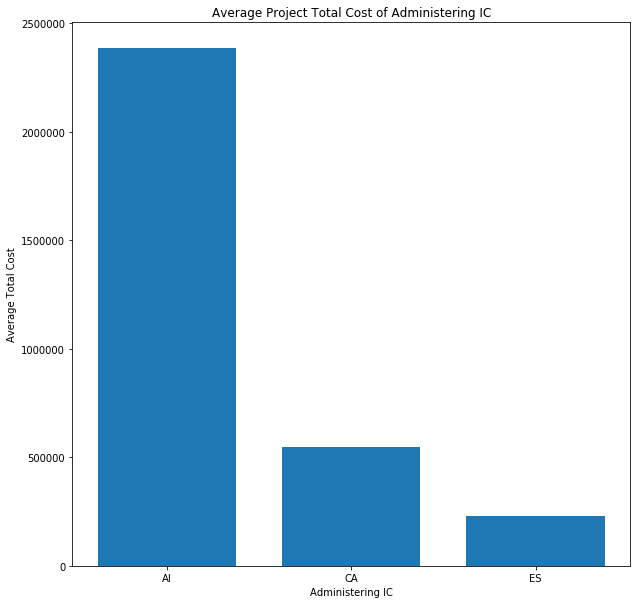

In [111]:
cost_by_admin = project_week_filtered[['ADMINISTERING_IC','TOTAL_COST']].groupby(['ADMINISTERING_IC']).mean().reset_index(drop=False)

x=np.array(cost_by_admin['ADMINISTERING_IC'])
y=np.array(cost_by_admin['TOTAL_COST'])

plt.figure(figsize=(10,10)) 
plt.bar(x, y, width=0.75)
plt.title('Average Project Total Cost of Administering IC')
plt.xlabel('Administering IC')
plt.ylabel('Average Total Cost')
plt.show()

We want to examine if there any correlation between cost and funding IC. For the funding IC, only the funding body is relevant, this is the acronym at the start of the string before the colon in the column 'FUNDING_ICs'.

Display a scatter plot where each point is a project, the x axis is the funding body (please order according to average funding by that body), and y axis is the total cost. Please avoid overlapping points completely.

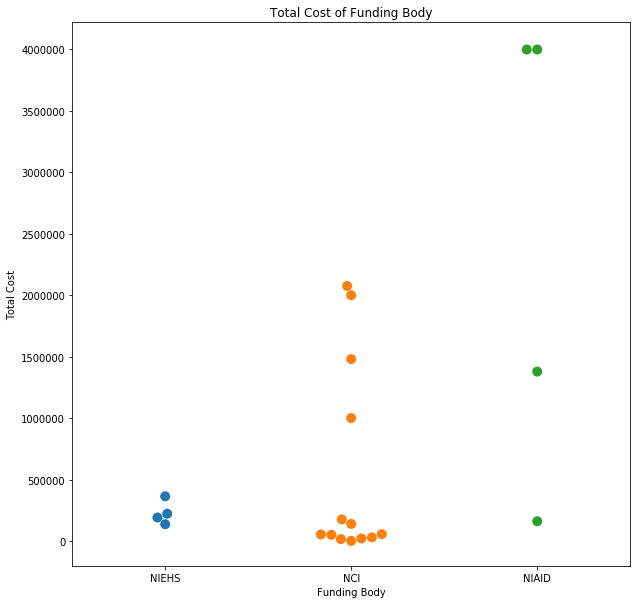

In [112]:
cost_by_fund_body = project_week_filtered['FUNDING_ICs'].str.split(':', expand=True)[0].to_frame(name='FUNDING_BODY')
cost_by_fund_body['TOTAL_COST'] = project_week_filtered['TOTAL_COST']

x_order = cost_by_fund_body.groupby(['FUNDING_BODY']).mean().reset_index(drop=False).sort_values(by=['TOTAL_COST'], ascending=True)['FUNDING_BODY']

plt.figure(figsize=(10,10)) 
sns.swarmplot('FUNDING_BODY', 'TOTAL_COST', data=cost_by_fund_body, order=x_order, size=10)
plt.title('Total Cost of Funding Body')
plt.xlabel('Funding Body')
plt.ylabel('Total Cost')
plt.show()


Compute a metric describing the degree of correlation between the two series.

# Modelling - classification challenge

For early stage research, we want to determine which study section each project belongs to, where this is not reported publically.

For this, we will need a larger dataset of historical projects with known study sections. Please open projects_2020.csv which has thousands of rows and some preprocessing already applied to it.

In [113]:
project_2020 = pd.read_csv('./projects_2020.csv')
project_2020

,Unnamed: 0,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,ED_INST_TYPE,FUNDING_MECHANISM,PHR,PROJECT_START,PROJECT_END,PROJECT_TITLE,STUDY_SECTION,SUPPORT_YEAR,DIRECT_COST_AMT,INDIRECT_COST_AMT,TOTAL_COST
0,2,R35,GM,5.0,SCHOOLS OF MEDICINE,NON-SBIR/STTR RPGS,Small macromolecules play key roles in nearly ...,2018-03-01,2023-02-28,DNA Nanostructures for High-Throughput Cryo-EM...,ZRG1,3.0,250000.0,152916.0,402916.0
1,5,R01,CA,5.0,SCHOOLS OF MEDICINE,NON-SBIR/STTR RPGS,Project Narrative We propose to develop a liqu...,2016-07-01,2022-06-30,Real-time monitoring of circulating pancreatic...,ZRG1,5.0,183819.0,77181.0,261000.0
2,8,R01,MH,5.0,SCHOOLS OF MEDICINE,NON-SBIR/STTR RPGS,Project Narrative: Achieving a more complete u...,2018-12-01,2021-06-30,Decoding Locus Coeruleus Neural Circuits and S...,ZRG1,6.0,347971.0,151877.0,499848.0
3,9,K01,OD,5.0,SCHOOLS OF VETERINARY MEDICINE,OTHER RESEARCH-RELATED,Project Narrative Cutaneous papillomaviruses c...,2017-09-15,2022-06-30,Mechanisms of Interferon Regulatory Factor Dys...,ZRG1,4.0,119750.0,9580.0,129330.0
4,10,R01,CA,5.0,SCHOOLS OF MEDICINE,NON-SBIR/STTR RPGS,PUBLIC HEALTH RELEVANCE: Understanding the mec...,2016-03-21,2021-02-28,(PQ6) Molecular Mechanisms Driving Benign to M...,ZCA1,5.0,326594.0,131380.0,457974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,78082,R21,CA,5.0,SCHOOLS OF ARTS AND SCIENCES,NON-SBIR/STTR RPGS,Project Narrative The proposed research will m...,2018-03-14,2021-02-28,Novel NeuCode Tagging Reagents for Identificat...,ZCA1,3.0,125000.0,59890.0,184890.0
14812,78093,DP1,DA,5.0,SCHOOLS OF MEDICINE,NON-SBIR/STTR RPGS,Narrative Addicts who can take high doses of o...,2019-08-15,2024-07-31,Acetylcholine signaling allows cognitive proce...,ZRG1,2.0,700000.0,472500.0,1172500.0
14813,78095,R35,GM,3.0,SCHOOLS OF ARTS AND SCIENCES,NON-SBIR/STTR RPGS,Project Narrative These studies will lead to a...,2016-05-01,2021-04-30,Mechanisms of Eukaryotic Gene Regulation,ZGM1,5.0,7175.0,4126.0,11301.0
14814,78099,R03,CA,7.0,SCHOOLS OF MEDICINE,NON-SBIR/STTR RPGS,PROJECT NARRATIVE Proposal will determine the ...,2019-04-01,2021-03-31,SerpinA6 Involvement in Prostate Cancer,ZCA1,2.0,50000.0,26250.0,76250.0


Using this dataset, design a model which classifies each project into study sections and display metrics describing its performance.

In [114]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in project_2020:
    col = []
    for var2 in project_2020 :
        cramers =cramers_V(project_2020[var1], project_2020[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = project_2020.columns, index =project_2020.columns)

df

,Unnamed: 0,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,ED_INST_TYPE,FUNDING_MECHANISM,PHR,PROJECT_START,PROJECT_END,PROJECT_TITLE,STUDY_SECTION,SUPPORT_YEAR,DIRECT_COST_AMT,INDIRECT_COST_AMT,TOTAL_COST
Unnamed: 0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
ACTIVITY,1.0,1.00,0.11,0.08,0.02,1.00,0.99,0.20,0.04,0.98,0.27,0.04,0.88,0.89,0.93
ADMINISTERING_IC,1.0,0.11,1.00,0.01,0.03,0.07,1.00,0.21,0.03,1.00,0.37,0.01,0.80,0.88,0.90
APPLICATION_TYPE,1.0,0.08,0.01,1.00,0.00,0.05,0.94,0.31,0.08,0.94,0.01,0.19,0.77,0.88,0.90
ED_INST_TYPE,1.0,0.02,0.03,0.00,1.00,0.01,0.99,0.13,0.02,0.99,0.02,0.01,0.75,0.87,0.90
FUNDING_MECHANISM,1.0,1.00,0.07,0.05,0.01,1.00,1.00,0.39,0.05,1.00,0.21,0.13,0.92,0.95,0.95
PHR,1.0,0.99,1.00,0.94,0.99,1.00,1.00,0.99,0.96,0.99,1.00,0.99,0.93,0.94,0.94
PROJECT_START,1.0,0.20,0.21,0.31,0.13,0.39,0.99,1.00,0.18,0.98,0.27,0.58,0.78,0.85,0.88
PROJECT_END,1.0,0.04,0.03,0.08,0.02,0.05,0.96,0.18,1.00,0.96,0.05,0.04,0.74,0.80,0.89
PROJECT_TITLE,1.0,0.98,1.00,0.94,0.99,1.00,0.99,0.98,0.96,1.00,1.00,0.91,0.93,0.94,0.94


In [115]:
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Crosstab building
    chi2 = stats.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1) 
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []

for var1 in project_2020:
    col = []
    for var2 in project_2020 :
        cramers =cramers_V(project_2020[var1], project_2020[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = project_2020.columns, index =project_2020.columns)

df

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In your model, which features are the most important for predicting STUDY_SECTION?